In [1]:
import os
def homePath(path):
    if path[0] == "~":
        return os.path.join(os.path.expanduser("~"), path.strip("~/"))
    else:
        return path

#Model Creation 1
#Figure out how to do versioning effectively
individualInput = False
combinedInputPath = "/mnt/SPDrive/SPGenerationsCPP/"
pathToTokenizedData = "C:\\Users\\mcall\\OneDrive\\Desktop\\DummyOutput\\Tokenizer\\"
pathToGradeData = "C:\\Users\\mcall\\OneDrive\\Desktop\\DummyOutput\\Grader\\"
GradesTokensName = ""


if not individualInput:
    pathToTokenizedData = os.path.join(combinedInputPath, "Tokens/")
    pathToGradeData = os.path.join(combinedInputPath, "Grades/")

if GradesTokensName == "":
    #Use newest folder for each

    #Get the newest folder for the tokens
    tokensFolders = os.listdir(pathToTokenizedData)
    tokensFolders.sort()
    pathToTokenizedData = os.path.join(pathToTokenizedData , tokensFolders[-1])

    #Get the newest folder for the grades
    gradesFolders = os.listdir(pathToGradeData)
    gradesFolders.sort()
    pathToGradeData = os.path.join(pathToGradeData,  gradesFolders[-1])
else:
    pathToTokenizedData = os.path.join(pathToTokenizedData, GradesTokensName)
    pathToGradeData = os.path.join(pathToGradeData, GradesTokensName)





modelOutputPath = "/mnt/SPDrive/SPGenerations/ModelsTest/"



In [2]:
import pandas as pd
import numpy as np
import pickle
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.text import tokenizer_from_json
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, GRU, Dropout
from keras.callbacks import EarlyStopping
from keras.models import load_model
from keras.models import model_from_json
from keras.models import Model
from matplotlib import pyplot as plt
import tensorflow as tf
import keras
import pickle
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.text import tokenizer_from_json
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
import keras.layers as layers
from keras.callbacks import EarlyStopping
from keras.models import load_model
from keras.models import model_from_json
from keras.models import Model




from keras.utils import pad_sequences
import os
import sys

sys.path.append('./SCA-Tokenizer/')
import CLPTokenizer as CLPTokenizer



#Load the data
#tokenized data is in tokenizedData.pkl, has tokenizer obj in tokenizer.json

#Load the tokenizer
with open(pathToTokenizedData + "/tokenizer.pkl", "rb") as f:
    tokenizer = pickle.load(f, encoding='latin1')


#Load the tokenized data
with open(pathToTokenizedData + "/tokenizedData.pkl", "rb") as f:
    tokenizedData = pickle.load(f)

print (tokenizedData)

#Load the grade data
#gradeData is a dict with keys as the file names and values as the grades
with open(pathToGradeData + "/grades.pkl", "rb") as f:
    gradeData = pickle.load(f)

print (gradeData)

#load the group data
#with open(pathToTokenizedData + "/tokenGroupDataframe.pkl", "rb") as f:
#    tokenizedGroupData = pickle.load(f)

combinedDF = pd.merge(tokenizedData, gradeData, on = "Path")
#combinedDF = pd.merge(combinedDF, tokenizedGroupData, on = "Path")
print (combinedDF)







2023-11-17 23:13:34.429315: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-17 23:13:34.464743: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-17 23:13:34.464763: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-17 23:13:34.464792: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-17 23:13:34.472076: I tensorflow/core/platform/cpu_feature_g

                                           tokenCode  \
0   14 15 16 17 18 5 19 20 21 22 23 24 25 26 27 2...   
1   14 15 16 17 18 5 19 20 21 22 23 24 25 26 27 2...   
2   14 312 16 313 5 19 20 21 22 23 24 25 26 27 28...   
3   14 312 16 313 5 19 20 453 22 454 455 456 457 ...   
4   14 312 16 313 5 19 20 453 22 454 455 456 457 ...   
5   14 312 16 313 5 19 20 453 22 454 455 456 457 ...   

                        Path  
0    /52652/Button.cpp/0.cpp  
1    /52652/Button.cpp/1.cpp  
2  /52669/FancyLED.cpp/0.cpp  
3  /52669/FancyLED.cpp/1.cpp  
4  /52669/FancyLED.cpp/3.cpp  
5  /52669/FancyLED.cpp/2.cpp  
   fileGrade                       Path
0       17.0    /52652/Button.cpp/0.cpp
1       27.0    /52652/Button.cpp/1.cpp
2        0.0  /52669/FancyLED.cpp/0.cpp
3        1.4  /52669/FancyLED.cpp/1.cpp
4        6.4  /52669/FancyLED.cpp/2.cpp
5       11.4  /52669/FancyLED.cpp/3.cpp
                                           tokenCode  \
0   14 15 16 17 18 5 19 20 21 22 23 24 25 26 27 2...  

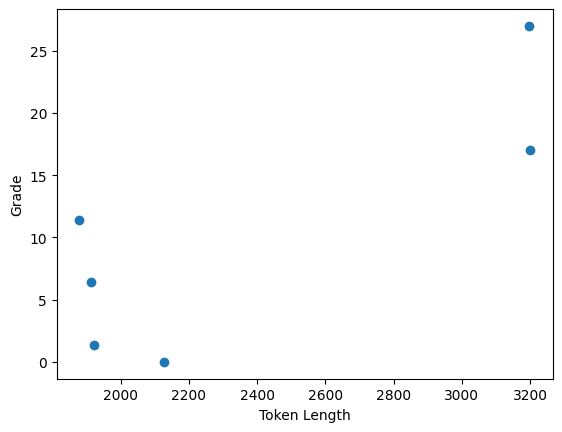

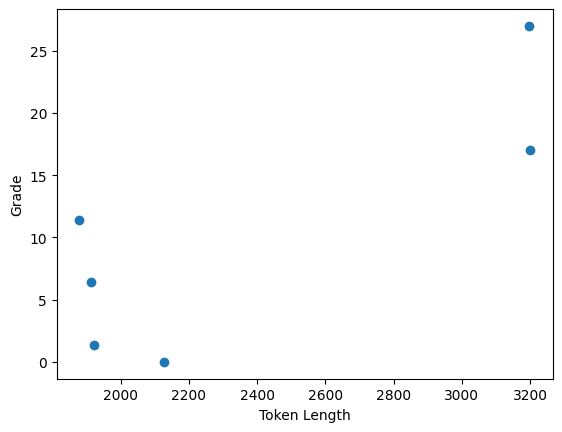

In [3]:
#chart of token length vs grade
tokenLengths = combinedDF["tokenCode"].apply(lambda x: len(x))
plt.scatter(tokenLengths, combinedDF["fileGrade"])
plt.xlabel("Token Length")
plt.ylabel("Grade")
plt.show()


#graph the density of the grades vs length
count = []
countLow = []
countHigh = []
for i in range(1, combinedDF["tokenCode"].apply(lambda x: len(x)).max() + 1):
    count.append(combinedDF[combinedDF["tokenCode"].apply(lambda x: len(x)) == i]["fileGrade"].mean())
    countLow.append(combinedDF[combinedDF["tokenCode"].apply(lambda x: len(x)) == i]["fileGrade"].quantile(.25))
    countHigh.append(combinedDF[combinedDF["tokenCode"].apply(lambda x: len(x)) == i]["fileGrade"].quantile(.75))

                 

plt.scatter(range(1, combinedDF["tokenCode"].apply(lambda x: len(x)).max() + 1), count)
#draw a line of best fit
z = np.polyfit(range(1, combinedDF["tokenCode"].apply(lambda x: len(x)).max() + 1), count, 1)
p = np.poly1d(z)
plt.xlabel("Token Length")
plt.ylabel("Grade")
plt.show()







In [4]:
#Padding

maxLen = 500
minLen = 100
#get rid of the ones that are too long
#combinedDF = combinedDF[combinedDF["tokenCode"].apply(lambda x: len(x)) <= maxLen]

#shorten the ones that are too long FOR TESTING
combinedDF["tokenCode"] = combinedDF["tokenCode"].apply(lambda x: [int(i) for i in x.split()[:maxLen]])

 

#get rid of the ones that are too short DISABLED FOR TESTING
#combinedDF = combinedDF[combinedDF["tokenCode"].apply(lambda x: len(x)) > minLen]

#Pad the sequences
combinedDF["tokenCode"] = pad_sequences(combinedDF["tokenCode"], maxlen = maxLen, padding = "post", truncating = "post").tolist()
#combinedDF["tokenGroupCode"] = pad_sequences(combinedDF["tokenGroupCode"], maxlen = maxLen, padding = "post", truncating = "post").tolist()

print (combinedDF)


#only use 5% of the dat

#combinedDF = combinedDF.sample(frac = 0.001, random_state = 1)

#48590 



                                           tokenCode  \
0  [14, 15, 16, 17, 18, 5, 19, 20, 21, 22, 23, 24...   
1  [14, 15, 16, 17, 18, 5, 19, 20, 21, 22, 23, 24...   
2  [14, 312, 16, 313, 5, 19, 20, 21, 22, 23, 24, ...   
3  [14, 312, 16, 313, 5, 19, 20, 453, 22, 454, 45...   
4  [14, 312, 16, 313, 5, 19, 20, 453, 22, 454, 45...   
5  [14, 312, 16, 313, 5, 19, 20, 453, 22, 454, 45...   

                        Path  fileGrade  
0    /52652/Button.cpp/0.cpp       17.0  
1    /52652/Button.cpp/1.cpp       27.0  
2  /52669/FancyLED.cpp/0.cpp        0.0  
3  /52669/FancyLED.cpp/1.cpp        1.4  
4  /52669/FancyLED.cpp/3.cpp       11.4  
5  /52669/FancyLED.cpp/2.cpp        6.4  


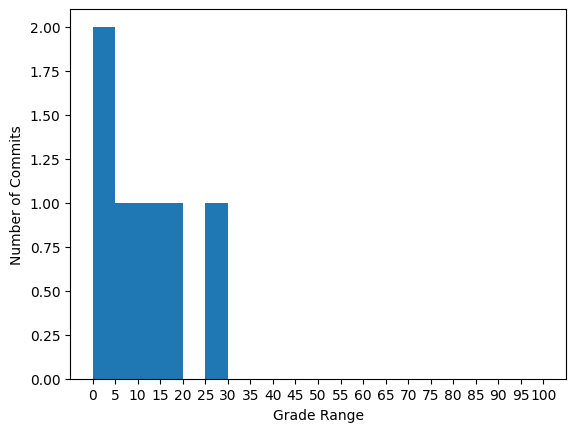

In [5]:
#create a chart of the grades
graph = plt.hist(combinedDF['fileGrade'], bins=20, range=(0, 100))
plt.xticks([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100])
plt.xlabel("Grade Range")
plt.ylabel("Number of Commits")
plt.show()



In [ ]:
#test to make sure gpu is detected and save as bool
gpu_detected = tf.test.is_gpu_available()


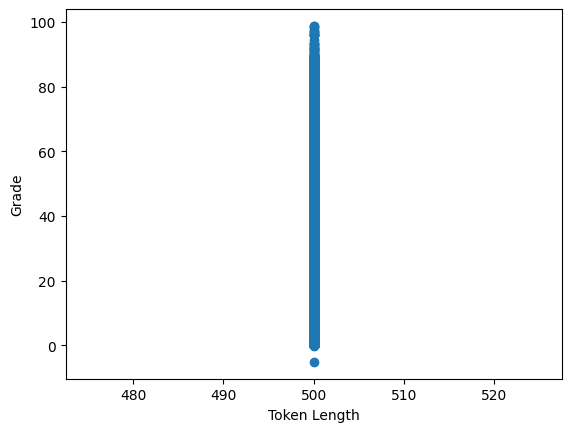

In [8]:
#if (not gpu_detected):
#    print("GPU not detected, using CPU")

number_of_tokens = combinedDF["tokenCode"].apply(lambda x: len(x)).max()
print (number_of_tokens)

model = Sequential()
model.add(Embedding(number_of_tokens, 64, input_length=maxLen))
model.add(layers.Conv1D(64, 3, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Reshape((1, 64)))
model.add(layers.Bidirectional(LSTM(64, return_sequences=True)))
model.add(Dropout(0.38479930887149405))
model.add(layers.Bidirectional(LSTM(64)))
model.add(layers.Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_logarithmic_error', optimizer='Adam', metrics=['mse', 'mae', 'mape', 'accuracy'])





# convert inputs to numpy arrays
token_code = np.array(combinedDF["tokenCode"].tolist())
#token_group_code = np.array(combinedDF["tokenGroupCode"].tolist())
file_grade = np.array(combinedDF["fileGrade"].tolist())

hist = model.fit(token_code, file_grade, epochs=100, batch_size=32, verbose=1)


#Save the model in timestamp folder and with tokenizer
timestamp = str(pd.Timestamp.now()).replace(" ", "_").replace(":", "-").replace(".", "-")
if not os.path.exists(modelOutputPath):
    os.mkdir(modelOutputPath)
if not os.path.exists(modelOutputPath + "/" + timestamp):
    os.mkdir(modelOutputPath + "/" + timestamp)
model.save(modelOutputPath + "/" + timestamp + "/model.h5")
with open(modelOutputPath + "/" + timestamp + "/tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)
#make an archaive of the SCA-Tokenizer Folder
#get CWD
cwd = os.getcwd()
if os.path.exists(os.path.join(cwd, "SCA-Tokenizer")):
    os.system("tar -czvf \"" + modelOutputPath + "/" + timestamp + "/SCA-Tokenizer.tar.gz\" " + os.path.join(cwd, "SCA-Tokenizer"))

#Save the AutoGrader Folder
autoGraderDir = os.path.join(cwd, "../Auto-Grader/")
if os.path.exists(autoGraderDir):
    os.system("tar -czvf \"" + modelOutputPath + "/" + timestamp + "/Auto-Grader.tar.gz\" " + autoGraderDir)

#Save tokenizedGroupData
#with open(modelOutputPath + "/" + timestamp + "/tokenizedGroupDataframe.pkl", "wb") as f:
#    pickle.dump(tokenizedGroupData, f)

500
Epoch 1/100
1/1 [==============================] - 5s 5s/step - loss: 5.0948 - mse: 198.5194 - mae: 10.5367 - mape: 956553.3125 - accuracy: 0.1667
Epoch 2/100
1/1 [==============================] - 0s 61ms/step - loss: 4.2761 - mse: 193.3009 - mae: 10.3643 - mape: 42753160.0000 - accuracy: 0.1667
Epoch 3/100
1/1 [==============================] - 0s 60ms/step - loss: 1.8808 - mse: 155.0428 - mae: 9.2863 - mape: 394782336.0000 - accuracy: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 0s 60ms/step - loss: 1.4481 - mse: 82.1610 - mae: 7.6439 - mape: 1481158528.0000 - accuracy: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 0s 60ms/step - loss: 1.8649 - mse: 89.9210 - mae: 8.2564 - mape: 2163852544.0000 - accuracy: 0.0000e+00
Epoch 6/100
1/1 [==============================] - 0s 61ms/step - loss: 1.6408 - mse: 79.0351 - mae: 7.6853 - mape: 1806652928.0000 - accuracy: 0.0000e+00
Epoch 7/100
1/1 [==============================] - 0s 60ms/step - loss: 1.3285

tar: Removing leading `/' from member names
tar: Removing leading `/home/mcall/SPGit/Model-Generation/../' from member names


In [ ]:
#Save the model in timestamp folder and with tokenizer
timestamp = str(pd.Timestamp.now()).replace(" ", "_").replace(":", "-").replace(".", "-")
if not os.path.exists(modelOutputPath):
    os.mkdir(modelOutputPath)
if not os.path.exists(modelOutputPath + "/" + timestamp):
    os.mkdir(modelOutputPath + "/" + timestamp)
model.save(modelOutputPath + "/" + timestamp + "/model.h5")
with open(modelOutputPath + "/" + timestamp + "/tokenizer.json", "w") as f:
    f.write(tokenizer.to_json())
#make an archaive of the SCA-Tokenizer Folder
#get CWD
cwd = os.getcwd()
if os.path.exists(os.path.join(cwd, "SCA-Tokenizer")):
    os.system("tar -czvf \"" + modelOutputPath + "/" + timestamp + "/SCA-Tokenizer.tar.gz\" " + os.path.join(cwd, "SCA-Tokenizer"))

#Save the AutoGrader Folder
autoGraderDir = os.path.join(cwd, "../Auto-Grader/")
if os.path.exists(autoGraderDir):
    os.system("tar -czvf \"" + modelOutputPath + "/" + timestamp + "/Auto-Grader.tar.gz\" " + autoGraderDir)

In [3]:
import os
timestamp = str(pd.Timestamp.now()).replace(" ", "_").replace(":", "-").replace(".", "-")
if not os.path.exists(modelOutputPath):
    os.mkdir(modelOutputPath)
if not os.path.exists(modelOutputPath + "/" + timestamp):
    os.mkdir(modelOutputPath + "/" + timestamp)

In [12]:
# assuming `model` is your Keras model
#convert inputs to numpy arrays



[(None, 33), (None, 33)]
[29, 384, 45, 374, 29, 1, 6, 1, 45, 374, 5, 1, 29, 1, 7, 142, 6, 176, 8, 9, 7, 1, 5, 142, 6, 1, 5, 176, 8, 82, 30, 22, 7, 384, 5, 1, 8, 11, 2, 18, 14, 22, 7, 12, 8, 11, 2, 2, 12, 5, 102, 7, 142, 6, 3, 10, 3, 8, 2, 2, 12, 5, 102, 7, 176, 6, 3, 10, 3, 8, 2, 2, 12, 5, 1, 7, 176, 6, 3, 10, 3, 8, 2, 2, 12, 5, 1, 7, 142, 6, 3, 10, 3, 8, 2, 2, 12, 5, 1, 7, 176, 6, 13, 8, 2, 2, 12, 5, 1, 7, 142, 6, 13, 8, 2, 2, 12, 5, 1, 7, 142, 6, 176, 8, 2, 18, 14, 25, 7, 12, 8, 11, 2, 2, 12, 5, 102, 7, 1, 7, 176, 8, 6, 142, 8, 2, 2, 12, 5, 102, 7, 1, 7, 142, 8, 6, 176, 8, 2, 18, 14, 26, 7, 12, 8, 11, 2, 2, 12, 5, 330, 7, 125, 6, 1, 6, 3, 10, 3, 8, 2, 18, 14, 28, 7, 12, 8, 11, 2, 2, 12, 5, 102, 7, 1, 7, 3, 10, 3, 8, 6, 7, 8, 8, 2, 2, 12, 5, 102, 7, 1, 7, 3, 10, 3, 8, 6, 7, 142, 6, 8, 8, 2, 2, 12, 5, 102, 7, 1, 7, 3, 10, 3, 8, 6, 7, 142, 6, 176, 6, 176, 6, 142, 8, 8, 2, 18, 14, 31, 7, 12, 8, 11, 2, 2, 12, 5, 330, 7, 125, 6, 1, 6, 3, 10, 3, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 